---

**Las imágenes** a utilizar en este cuaderno son:

- senial_prohibido_90.jpg
- arco_iris.bmp
- formas_y_colores.jpg

---

**Montamos el Drive** de nuestro repositorio de Google para tener acceso a las imágenes que empleamos en este cuaderno:

---


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

---

**Importamos las librerias** que vamos a emplear en este cuaderno:

---

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

---

# Procesamiento de Color con OpenCV

En este cuaderno estudiamos los espacios de color RGB y HSV. Veremos cómo detectar colores en ambos espacios de color y también cómo reducir el número de colores empleados en una imagen para simplicar la detección (empleando K-medias como clasificador no supervisado de los colores de una imagen).

---

Conversiones entre espacios de color en OpenCV

Convertimos la imagen BGR a diferentes espacios de color. Cada conversión de espacio de color se realiza utilizando el código de conversión cv2.COLOR_BGR2... correspondiente.

---


In [3]:
"""
cv2.COLOR_BGR2BGRA # BGRA tiene 4 planos de color y el cuarto indica transparencia
cv2.COLOR_BGR2GRAY
cv2.COLOR_BGR2HLS
cv2.COLOR_BGR2HSV
cv2.COLOR_BGR2LAB
cv2.COLOR_BGR2LUV
cv2.COLOR_BGR2RGB
cv2.COLOR_BGR2RGBA # RGBA tiene 4 planos de color y el cuarto indica transparencia
cv2.COLOR_BGR2XYZ
cv2.COLOR_BGR2YCrCb
cv2.COLOR_BGR2YUV
...
"""

# mostramos todos los flags para cambios de espacios de color en OpenCV
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

---

### Espacio de color RGB:

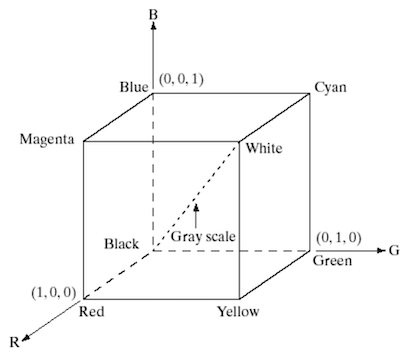


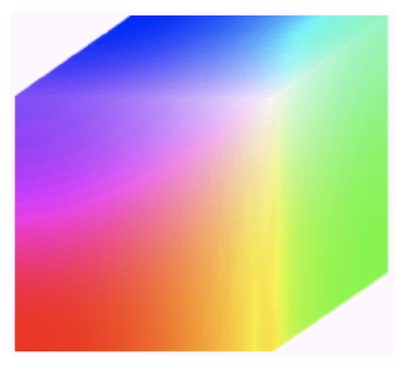

---


### Espacio de color HSV:

En la siguiente imagen representamos los valores de H en la coordenada horizontal (0 .. 179) y los valores de S en la coordernada vertical (0 .. 255), considerando que la luminosidad es máxima (255).

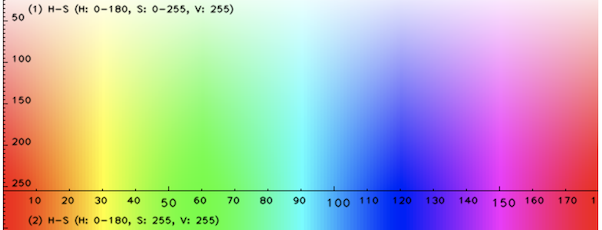

---


## Ejemplo 1: detectar el color azul en HSV

---


Imagen Original


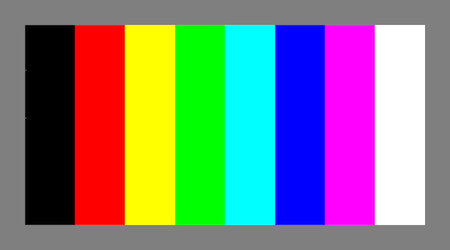

Máscara


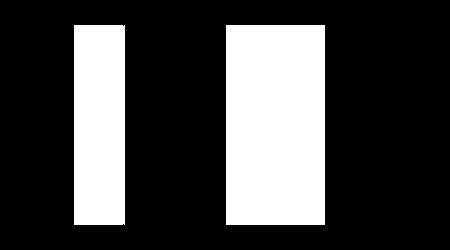

Resultado


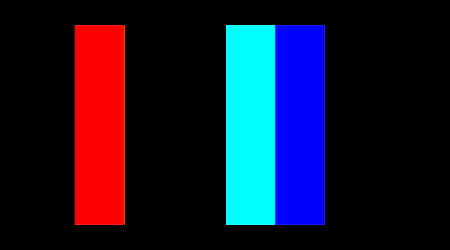

In [6]:
import cv2
import numpy as np

# Abrimos imagen y la convertimos a HSV
path = "/content/drive/MyDrive/fuck/"
nombre_imagen = 'arco_iris.bmp' # 'circulos.jpg' # 's5.jpg'
path += nombre_imagen

imgBGR = cv2.imread(path, cv2.IMREAD_COLOR)
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
imgHSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV)

# Definimos el rango del color azul en HSV
umbral_bajo_azul = np.array([90, 50, 50])
umbral_alto_azul = np.array([130, 255, 255])
umbral_bajo_rojo = np.array([0, 50, 50])
umbral_alto_rojo = np.array([10, 255, 255])

# Umbralizamos la imagen HSV image para quedarnos sólo con los colores azules
mascara = cv2.inRange(imgHSV, umbral_bajo_azul, umbral_alto_azul)
mascara = cv2.add(mascara, cv2.inRange(imgHSV, umbral_bajo_rojo, umbral_alto_rojo))

# Realizamos una operación Bitwise-AND entre la máscara y la imagen original
res = cv2.bitwise_and(imgBGR, imgBGR, mask=mascara)

# Mostramos los resultaos
print('Imagen Original')
cv2_imshow(imgBGR)
print('Máscara')
cv2_imshow(mascara)
print('Resultado')
cv2_imshow(res)


---

## Ejemplo 2: detectar el color **rojo** en HSV

---


Imagen Original


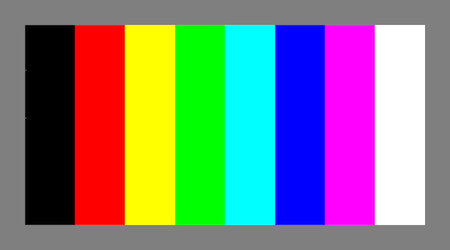

Máscara


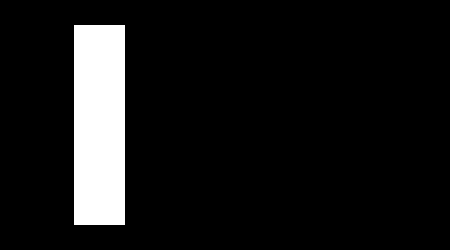

Resultado


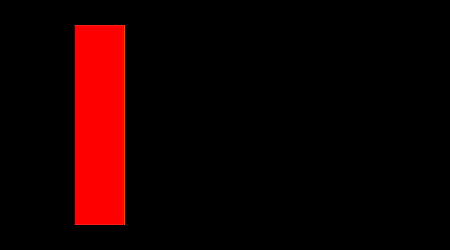

In [9]:
# Abrimos imagen y la convertimos a HSV
path = "/content/drive/MyDrive/fuck/"
nombre_imagen = 'arco_iris.bmp'
path += nombre_imagen

imgBGR = cv2.imread(path, cv2.IMREAD_COLOR)
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
imgHSV = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2HSV)

# Definimos los rangos del color rojo en HSV
redBajo1 = np.array([0, 100, 20], np.uint8)
redAlto1 = np.array([8, 255, 255], np.uint8)

redBajo2=np.array([175, 100, 20], np.uint8)
redAlto2=np.array([179, 255, 255], np.uint8)

# Obtemos las máscaras y las combinamos
maskRed1 = cv2.inRange(imgHSV, redBajo1, redAlto1)
maskRed2 = cv2.inRange(imgHSV, redBajo2, redAlto2)
maskRed = cv2.add(maskRed1, maskRed2)
res = cv2.bitwise_and(imgBGR, imgBGR, mask=maskRed)

# Mostramos los resultaos
print('Imagen Original')
cv2_imshow(imgBGR)
print('Máscara')
cv2_imshow(maskRed)
print('Resultado')
cv2_imshow(res)


---

**Nota 1**: como podemos observar, si los colores están bien definidos, resultará más preciso detectar primero el color y, posteriormente, la forma.

**Nota 2**: evidentemente, en imágenes reales será necesario realizar algún procesamiento previo (preproceso) como el suavizado, la reducción del número de colores, etc.

**Nota 3**: así mismo, en imágenes reales también será necesario realizar algún procesamiento posterior para eleminar el ruido presente en nuestros detectores, empleando, por ejemplo, un filtrado morfológico:

    kernel = np.ones((7,7), np.uint8) # elemento estructurante
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel) # para eliminar ruido negro sobre regiones blancas
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel) # para eliminar ruido blanco sobre regiones negras

---


## Ejemplo 3: ¿Cómo encontrar los valores HSV a rastrear?

Podemos usar la misma función **cvtColor()**. En lugar de pasar una imagen, simplemente pasamos los valores BGR que deseamos rastrear. Por ejemplo, para encontrar el valor HSV del color verde puro:

---



In [10]:
verde = np.uint8([[[0, 255, 0]]])
hsv_verde = cv2.cvtColor(verde, cv2.COLOR_BGR2HSV)
print(hsv_verde)

[[[ 60 255 255]]]


---

Como podemos ver el tono de este color se encuentra en H = 60; por lo tanto, nuestro rango en H debería ser [H-10 .. H+10]

De igual modo, en este caso la saturación y la luminosidad son máximas ya que estamos obtenidos los datos de un color puro. Dependiendo de nuestros objetivos tendremos que definir estos rangos. Por ejemplo: para S = [100 .. 255] y para V = [20 .. 255]

---


---

# EJERCICIO 1: Rastrear colores en HSV

- Detectar todas las franjas de color presentes en la imagen arco_iris.jpg (recordar que tanto para rastrear blanco como negro, sólo nos interesa la luminosidad)

- Detectar el color rojo de la señal de prohibido de la imagen senial_prohibido_90.jpg

---


In [16]:
def create_hsv_ranges(hsv_values):
  lower_range = [hsv_values[0] - 10, 100, 20]
  if lower_range[0] < 0:
    lower_range[0] = hsv_values[0]
  upper_range = [hsv_values[0] + 10, 255, 255]
  return np.array(lower_range, np.uint8), np.array(upper_range, np.uint8)

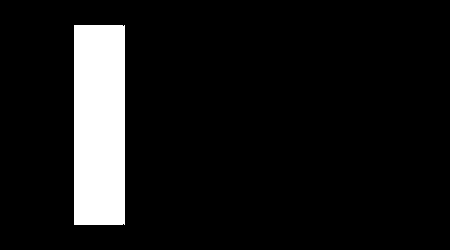

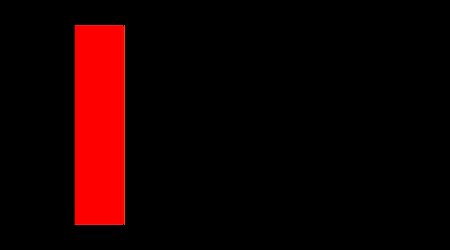

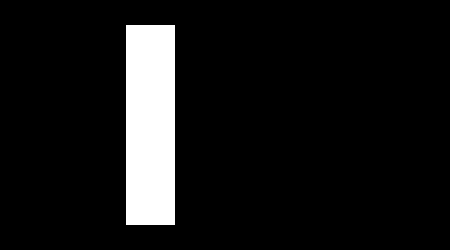

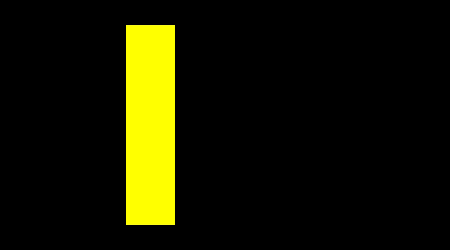

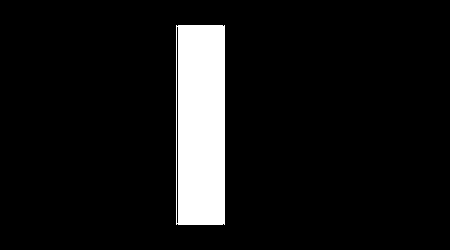

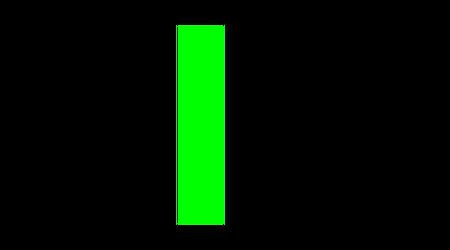

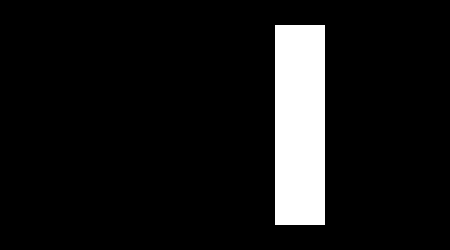

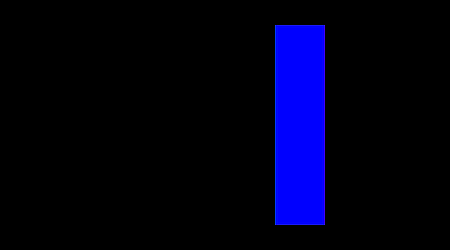

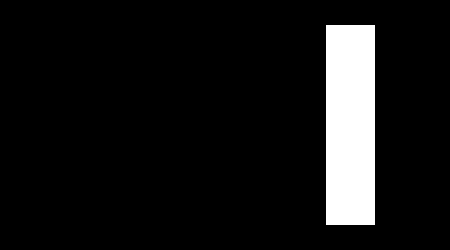

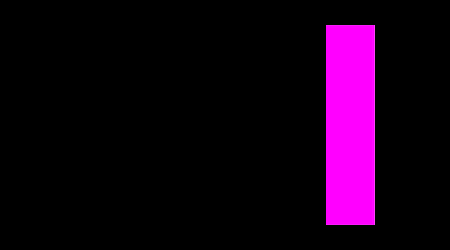

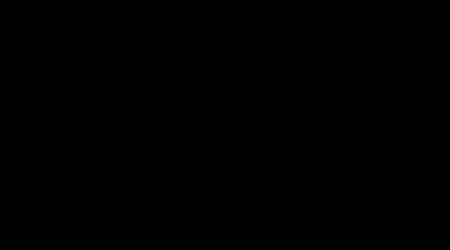

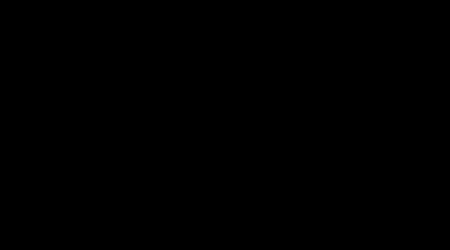

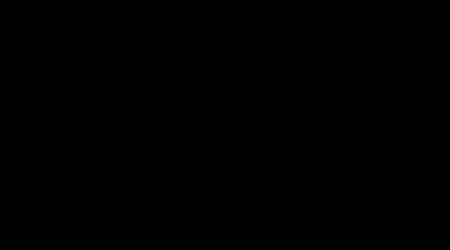

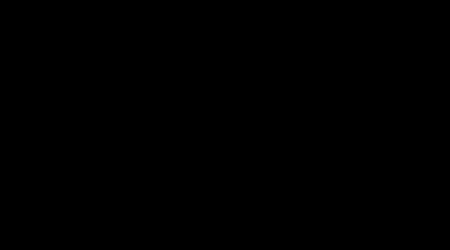

In [42]:
import numpy as np
# Definir los rangos de color para cada franja del arcoíris en HSV
rojo_bajo1 = np.array([0, 100, 20], np.uint8)
rojo_alto1 = np.array([10, 255, 255], np.uint8)

rojo_bajo, rojo_alto = create_hsv_ranges([0, 240, 120])
yellow_bajo, yellow_alto = create_hsv_ranges([40, 240, 120])
green_bajo, green_alto = create_hsv_ranges([70, 240, 120])
aqua_bajo, aqua_alto = create_hsv_ranges([120, 240, 120])
blue_bajo, blue_alto = create_hsv_ranges([160, 240, 120])
pink_bajo, pink_alto = create_hsv_ranges([200, 240, 120])
white_bajo, white_alto = (np.array([0, 240, 240], np.uint8), np.array([0, 240, 240], np.uint8))

# Cargar la imagen
path = "/content/drive/MyDrive/fuck/"
nombre_imagen = 'arco_iris.bmp'
signal = '/content/drive/MyDrive/fuck/senial_prohibido_90.jpg'
path += nombre_imagen

rbBGR = cv2.imread(path, cv2.IMREAD_COLOR)
rbHSV = cv2.cvtColor(rbBGR, cv2.COLOR_BGR2HSV)

signalBGR = cv2.imread(signal, cv2.IMREAD_COLOR)
signalHSV = cv2.cvtColor(signalBGR, cv2.COLOR_BGR2HSV)

# Crear máscaras para cada color
maskRojo = cv2.inRange(rbHSV, rojo_bajo, rojo_alto)
resRojo = cv2.bitwise_and(rbBGR, rbBGR, mask=maskRojo)
maskYellow = cv2.inRange(rbHSV, yellow_bajo, yellow_alto)
resYellow = cv2.bitwise_and(rbBGR, rbBGR, mask=maskYellow)
maskGreen = cv2.inRange(rbHSV, green_bajo, green_alto)
maskAqua = cv2.inRange(rbHSV, aqua_bajo, aqua_alto)
maskBlue = cv2.inRange(rbHSV, blue_bajo, blue_alto)
maskPink = cv2.inRange(rbHSV, pink_bajo, pink_alto)
maskWhite = cv2.inRange(rbHSV, white_bajo, white_alto)

mascaras = (maskRojo, maskYellow, maskGreen, maskAqua, maskBlue, maskPink, maskWhite)

for img in mascaras:
  cv2_imshow(img)
  cv2_imshow(cv2.bitwise_and(rbBGR, rbBGR, mask=img))

---

# EJERCICIO 2: Rastrear colores en RGB

- Recortamos una ROI de una zona en la que se encuentre el color que queremos detectar y obtenemos los valores medios y las desviaciones típicas de cada uno de los planos:

    med(r), med(g) y med(b)
    
    desv(r), desv(g) y desv(b)

- Y, para detectar, consideramos como válidos los puntos que se ecuentran dentro del siguiente espacio de dimensiones:

    x = [(med(r) - (1.25 · desv(r)) .. (med(r) + (1.25 · desv(r))]

    y = [(med(g) - (1.25 · desv(g)) .. (med(g) + (1.25 · desv(g))]

    z = [(med(b) - (1.25 · desv(b)) .. (med(b) + (1.25 · desv(b))]

- Los resultados obtenidos son más precisos que los obtenidos con HSV

---


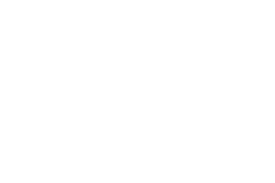

In [44]:
import numpy as np
def detect_color_rgb(image, roi):

  # Extraer la ROI de la imagen
  roi_image = image[roi[1]:roi[3], roi[0]:roi[2]]

  # Calcular la media y la desviación estándar de cada canal RGB en la ROI
  b_mean, g_mean, r_mean = cv2.mean(roi_image)[:3]
  b_std, g_std, r_std = np.std(roi_image, axis=(0, 1))

  # Definir los rangos de color para cada canal RGB
  r_lower = int(max(0, r_mean - 1.25 * r_std))
  r_upper = int(min(255, r_mean + 1.25 * r_std))
  g_lower = int(max(0, g_mean - 1.25 * g_std))
  g_upper = int(min(255, g_mean + 1.25 * g_std))
  b_lower = int(max(0, b_mean - 1.25 * b_std))
  b_upper = int(min(255, b_mean + 1.25 * b_std))


  # Crear una máscara para los píxeles que están dentro del rango de color definido
  mask = cv2.inRange(image, (b_lower, g_lower, r_lower), (b_upper, g_upper, r_upper))

  return mask

# Ejemplo de uso:
# Definir la ROI para la señal de prohibido (puedes ajustar los valores según la imagen)
roi = (300, 100, 500, 300) # (x_inicial, y_inicial, x_final, y_final)
mask_rojo = detect_color_rgb(signalBGR, roi)

cv2_imshow(mask_rojo)



## Ejemplo 4: Algoritmo K-Medias (K-Means) y su aplicación en OpenCV para la cuantificación del Color

En OpenCV, para ejecutar el algoritmo k-means se emplea la función **kmeans** que tiene los siguientes parámetros de entrada:

- Datos sin etiquetar en formato float32
- El número K de grupos necesarios
- Los criterios de terminación, TERM_CRITERIA_EPS y TERM_CRITERIA_MAX_ITER, que definen la precisión deseada y el número máximo de iteraciones, respectivamente, que al alcanzarse, indican que la iteración del algoritmo debe detenerse
- El número de intentos, que indica el número de veces que se ejecutará el algoritmo con un etiquetado inicial diferente, en un intento de encontrar la mejor compactación del clúster
- La forma en que se inicializarán los centros del clúster, ya sea aleatoria, proporcionada por el usuario o mediante un método de inicialización de centros como kmeans++

Así mismo, el algoritmo de agrupamiento k-means en OpenCV devuelve:

- La compactación de cada grupo, calculada como la suma de la distancia al cuadrado de cada punto de los datos a su centro de grupo correspondiente. Un valor de compactación más pequeño indica que los puntos de datos se distribuyen más cerca de su centro de grupo correspondiente y, por lo tanto, que el grupo es más compacto
- Las etiquetas de grupo predichas que asocian cada punto de datos de entrada a su grupo correspondiente
- Las coordenadas de los centros de cada grupo de puntos de las agrupaciones de datos

---


In [ ]:
from cv2 import kmeans, TERM_CRITERIA_MAX_ITER, TERM_CRITERIA_EPS, KMEANS_RANDOM_CENTERS, imread, cvtColor, COLOR_BGR2RGB
from numpy import float32, uint8, unique
from matplotlib.pyplot import show, imshow

path = "/content/drive/MyDrive/Curso_24_25/imas/"
nombre_imagen = 'senial_prohibido_90.jpg'
path += nombre_imagen

# Leemos la imagen de entrada
imgBGR = cv2.imread(path, cv2.IMREAD_COLOR)
imgRGB = cvtColor(imgBGR, COLOR_BGR2RGB)
print(f'Dimensiones de la imagen original: {imgRGB.shape}')

# Redimensionamos la imagen a un array Mx3
img_data = imgRGB.reshape(-1, 3) # -1 para que encuentre el número de filas (M) que será el número de filas x columnas de la imagen original
print(f'Dimensiones de la imagen redimensionada: {img_data.shape}')

# Encontramos el número de valores RGB únicos existentes en la imagen original
print(len(unique(img_data, axis=0)), 'valores RGB únicos dentro de los', img_data.shape[0], 'píxeles de la imagen')

# Mostramos la imagen original
imshow(imgRGB)
show()

# Especificamos los criterios de terminación del algoritmo k-means
criteria = (TERM_CRITERIA_MAX_ITER + TERM_CRITERIA_EPS, 10, 1.0)

# Ejecutamos el algoritmo k-means
k = 4 # número de agrupaciones o clústers
compactness, labels, centers = kmeans(data=img_data.astype(float32), K=k, bestLabels=None, criteria=criteria, attempts=10, flags=KMEANS_RANDOM_CENTERS)
print(f'Los centros de las {k} agrupaciones encontradas son:\n{centers}')

# Aplicamos los valores del centro de los clústers a todos los píxeles de la imagen
colours = centers[labels].reshape(-1, 3)

# Encontramos el número de valores RGB únicos existentes en la imagen resultante
print(len(unique(colours, axis=0)), 'valores RGB únicos dentro de los', img_data.shape[0], 'píxeles de la imagen')

# Redimensionamos a las dimensiones originales de la imagen
img_colours = colours.reshape(imgRGB.shape)

# Mostramos la imagen resultado con los colores cuantificados por k-means
imshow(img_colours.astype(uint8))
show()


---

# EJERCICIO 3: Detectar formas y colores

- Hacer un programa en python en el que el usuario elija una forma y un color y detecte todos aquellos objetos que cumplan con las dos condiciones

- Utilizar la imagen formas_y_colores.jpg

---


---

# EJERCICIO 4: Comprimir imágenes en color

- Utilizar la lena.bmp

- Comprimir la imagen empleando el método de cuantificación del color empleando k-medias visto en el ejemplo 4 consiguiendo que la imagen ocupe 1/3 de su tamaño (en memoria o en disco)

**Nota 1**: si definimos k = 256 podemos utilizar un byte para almacenar cada uno de los colores de la imagen en lugar de los 3 bytes requerido para una imagen en RGB

**Nota 2**: podemos utilizar una imagen en nivel de gris para almacenar los pixeles de la nueva imagen (en este caso tendremos que utilizar alguna estructura adicional para escribir los datos de los centroides) o podemos utilizar un fichero binario con un formato propio que contenga una cabecera con los metadatos de la imagen (alto, ancho y centroides) y los datos de los píxeles (etiquetas) almacenados byte a byte

Para leer de un fichero binario:

```
with open("my_binary_file.bin", "rb") as file:
  for byte in file.read():
    print(byte) # Process each byte
```

Para escribir en un fichero binario:

```
arr = bytearray([1, 2, 5])
b_arr = bytes(arr)

with open("test.bin", "wb") as f:
    f.write(b_arr)
```

---
